In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/noemifiallos/unir_test/main/StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
# Convertir la columna "gender" a categoría
df["gender"] = df["gender"].astype("category")

# Calcular el coeficiente de correlación de Pearson
corr = np.corrcoef(df["math score"], df["gender"].cat.codes)[0, 1]

# Imprimir el valor de la correlación
print(f"Correlación entre 'gender' y 'math_score': {corr}")

Correlación entre 'gender' y 'math_score': 0.16798223810035579


In [6]:
df.dtypes

gender                         category
race/ethnicity                   object
parental level of education      object
lunch                            object
test preparation course          object
math score                        int64
reading score                     int64
writing score                     int64
dtype: object

In [7]:
medias_por_genero = df.groupby("gender")["math score"].mean()

print(f"Medias por género: {medias_por_genero}")

Medias por género: gender
female    63.633205
male      68.728216
Name: math score, dtype: float64


In [8]:
desviaciones_estandar_por_genero = df.groupby("gender")["math score"].std()

print(f"Desviaciones estándar por género: {desviaciones_estandar_por_genero}")

Desviaciones estándar por género: gender
female    15.491453
male      14.356277
Name: math score, dtype: float64


In [9]:
varianza_por_genero = df.groupby("gender")["math score"].var()

print(f"Varianza por género: {varianza_por_genero}")

Varianza por género: gender
female    239.985124
male      206.102695
Name: math score, dtype: float64


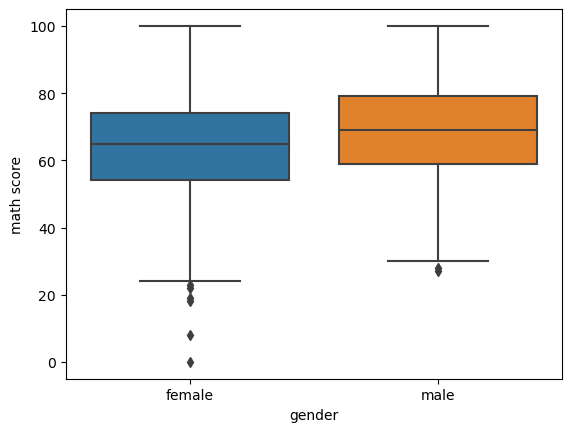

In [10]:
sns.boxplot(data=df, x="gender", y="math score")
plt.show()

C:\Users\noemi.fiallos\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


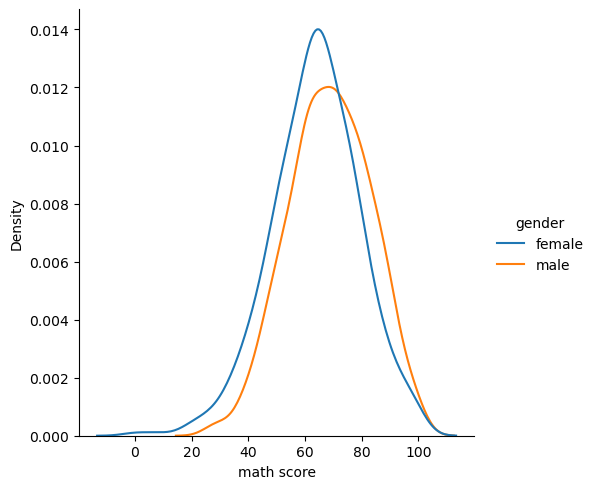

In [11]:
sns.displot(data=df, x="math score", hue="gender", kind="kde")
plt.show()

In [31]:
# Realizar el contraste de t de Student
group1 = df[df["gender"] == "male"]["math score"]
group2 = df[df["gender"] == "female"]["math score"]

In [32]:
group1

3      47
4      76
7      40
8      64
10     58
       ..
985    57
987    81
990    86
994    63
996    62
Name: math score, Length: 482, dtype: int64

In [33]:
group2

0      72
1      69
2      90
5      71
6      88
       ..
993    62
995    88
997    59
998    68
999    77
Name: math score, Length: 518, dtype: int64

In [37]:
t_statistic, p_value = ttest_ind(group1, group2)

# Imprimir resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: 5.383245869828983
Valor p: 9.120185549328822e-08


In [39]:
import pandas as pd
import scipy.stats as stats

# Cargar la base de datos
df= pd.read_csv('https://raw.githubusercontent.com/noemifiallos/unir_test/main/StudentsPerformance.csv')

# Seleccionar las variables
lunch_type = df["lunch"]
reading_score = df["reading score"]

# Prueba t para dos muestras independientes
t_stat, p_value = stats.ttest_ind(reading_score[lunch_type == "standard"], reading_score[lunch_type == "free/reduced"])

# Imprimir resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Evaluación de la hipótesis
if p_value < 0.05:
    print("Se rechaza la hipótesis nula.")
    print("Los estudiantes que tienen un almuerzo estándar obtienen mejores calificaciones en lectura.")
else:
    print("No se rechaza la hipótesis nula.")
    print("No hay evidencia suficiente para concluir que los estudiantes que tienen un almuerzo estándar obtienen mejores calificaciones en lectura.")

Estadístico t: 7.451056467473455
Valor p: 2.0027966545279011e-13
Se rechaza la hipótesis nula.
Los estudiantes que tienen un almuerzo estándar obtienen mejores calificaciones en lectura.


In [42]:
medias_por_luch = df.groupby("lunch")["reading score"].mean()

print(f"Medias por género: {medias_por_luch}")

Medias por género: lunch
free/reduced    64.653521
standard        71.654264
Name: reading score, dtype: float64
